In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from aegomoku.gomoku_game import ConstantBoardInitializer, GomokuGame
from aegomoku.arena import Arena
from aegomoku.interfaces import MctsParams, PolicyParams
from aegomoku.gomoku_players import PolicyAdvisedGraphSearchPlayer

In [9]:
# The game is Gomoku on a 15x15 board
BOARD_SIZE = 15
cbi = ConstantBoardInitializer(stones='')
the_game = GomokuGame(board_size=BOARD_SIZE, initializer=cbi)

# Bobby Black, the freshly trained contender
mcts_bobby = MctsParams(cpuct=4.0, temperature=0, num_simulations=400)
policy_bobby = PolicyParams(model_file_name="models/1_c1.model", advice_cutoff=.01)
player1 = PolicyAdvisedGraphSearchPlayer("Bobby Black", the_game, mcts_bobby, policy_bobby)

# Willy White, the heuristic champion
mcts_willy = MctsParams(cpuct=4.0, temperature=0, num_simulations=400)
policy_willy = PolicyParams(model_file_name=None, advice_cutoff=.01)
player2 = PolicyAdvisedGraphSearchPlayer("Willy White", the_game, mcts_willy, policy_willy)

arena = Arena(game=the_game, player1=player1, player2=player2, max_moves=100)

In [6]:
arena.play_game(verbose=2)

Bobby Black to begin with black.


2022-09-07 20:04:18.134602: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-09-07 20:04:18.326888: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


1: Bobby Black: H8
2: Willy White: I7
3: Bobby Black: J6
4: Willy White: H9
5: Bobby Black: I10
6: Willy White: J10
7: Bobby Black: K9
8: Willy White: K8
9: Bobby Black: J7
10: Willy White: J4
11: Bobby Black: K6
12: Willy White: L6
13: Bobby Black: M7
14: Willy White: M4
15: Bobby Black: L4
16: Willy White: J5
17: Bobby Black: I4
18: Willy White: K7
19: Bobby Black: M5
20: Willy White: J2
21: Bobby Black: J1
22: Willy White: I9
23: Bobby Black: H10
24: Willy White: F9
25: Bobby Black: E9
26: Willy White: J9
27: Bobby Black: G9
28: Willy White: J12
29: Bobby Black: J11
30: Willy White: E7



KeyboardInterrupt



In [17]:
print(arena.board.get_stones())

[H8, I9, J10, H7, I6, J6, K7, K8, J9, J12, K10, M12, L10, M10, M11, K12, L12, L11, N9, N11, L9, K9, I10, H10, K13, J14, N7, M8, N8, N6, M7, L7, L6, K5, K14, L4, M3, M5]


In [8]:
stats = arena.play_games(20, verbose=1)

Arena.play_games (1):   0%|          | 0/10 [00:00<?, ?it/s]

Bobby Black to begin with black.


Arena.play_games (1):  10%|█         | 1/10 [21:06<3:10:02, 1266.94s/it]

Bobby Black (black) won.
Winner: Bobby Black
[H8, I7, J6, H9, I10, J10, K9, K8, J7, J4, K6, L6, M7, M4, L4, J5, I4, K7, M5, J2, J1, I9, H10, F9, E9, J9, G9, J12, J11, E7, F10, E10, G11, D8, G10, G8, H7, D11, C12, G12, H12, I13, D10, C9, B10, K11, H14, H13, I14, G14, D12, E11, C11, B12, E13, F14, A9]
Bobby Black to begin with black.


Arena.play_games (1):  20%|██        | 2/10 [41:01<2:43:13, 1224.15s/it]

Bobby Black (black) won.
Winner: Bobby Black
[H8, I7, J6, H9, I10, J10, K9, K8, J7, J4, K6, L6, M7, M4, L4, J5, I4, G6, F6, E5, F5, F8, F4, F3, F9, F11, E12, G7, G9, G4, G5, E2, H5, E3, E4, G3, H3, H4, D10, D3, C3, B5, C4, C6, E10, D11, E11, E13, F12, C9, F10, D12, G10, H10, C10]
Bobby Black to begin with black.


Arena.play_games (1):  30%|███       | 3/10 [1:16:23<3:10:41, 1634.46s/it]

Willy White (white) won.
Winner: Willy White
[H8, I7, J6, G8, F7, F6, G5, H5, I6, L6, J5, J4, K5, K4, L5, M5, K7, H4, I4, H3, H6, L8, H1, J7, K9, K8, M8, L7, J9, L9, L10, M10, N11, M11, M13, H10, G10, K10, G6, K6, G3, G7, G2, G4, F5, E4, D4, I8, I11, G11, F12, F11, D11, M6, N6, M4, M3, N5, O4, K2, L3, J3, N2, L4, N4, D10, E9, F9, I5, I2, J2, D5, B7, H9, G9, E12, I10, I13, H12, G13]
Bobby Black to begin with black.


Arena.play_games (1):  40%|████      | 4/10 [1:52:37<3:04:44, 1847.49s/it]

Willy White (white) won.
Winner: Willy White
[H8, I7, J6, F8, F7, H9, G10, F6, G5, H5, I6, H6, G7, G8, D7, E7, E8, F9, D9, C10, D6, D10, D4, D5, E10, I9, G9, H4, H3, C8, C9, J9, K9, I10, J11, L7, H11, I11, I8, K7, J7, H10, J8, L8, I13, L10, L9, K10, J10, J5, M8, M10, M6, M5, K5, L6, L4, O3, N4, K4, N2, M3, N5, N1, N6, N3, N8, N7, K3, I3, O7, N10, O10, O9, M2, K2, J3, O11, M9, G12]
Bobby Black to begin with black.


Arena.play_games (1):  50%|█████     | 5/10 [2:08:13<2:06:33, 1518.61s/it]

Bobby Black (black) won.
Winner: Bobby Black
[H8, I7, H9, H6, H10, H11, J8, I9, I8, G8, G10, J7, E10, F10, F11, E12, G12, H13, G13, G11, G7, H12, E9, E7, D9, C8, B9, C9, D8, C7, C10, D6, F7, G6, B11, E8, D10, D11, B12, B10, C11, F8, A13]
Bobby Black to begin with black.


Arena.play_games (1):  60%|██████    | 6/10 [2:18:01<1:20:08, 1202.25s/it]

Willy White (white) won.
Winner: Willy White
[H8, I7, H9, H10, G8, I8, I10, F7, G7, I9, G5, G6, J9, J8, K7, K9, L10, I6, I5, H5, E8, H6, F6, H4, H3, G4, J7, I4, F4, J3]
Bobby Black to begin with black.


Arena.play_games (1):  60%|██████    | 6/10 [2:27:15<1:38:10, 1472.55s/it]


ValueError: If a single argument is provided, it must be a string or integer representation of the move.

/home/wgiersche/.local/share/virtualenvs/DeepGomoku-yQC4gx5q/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


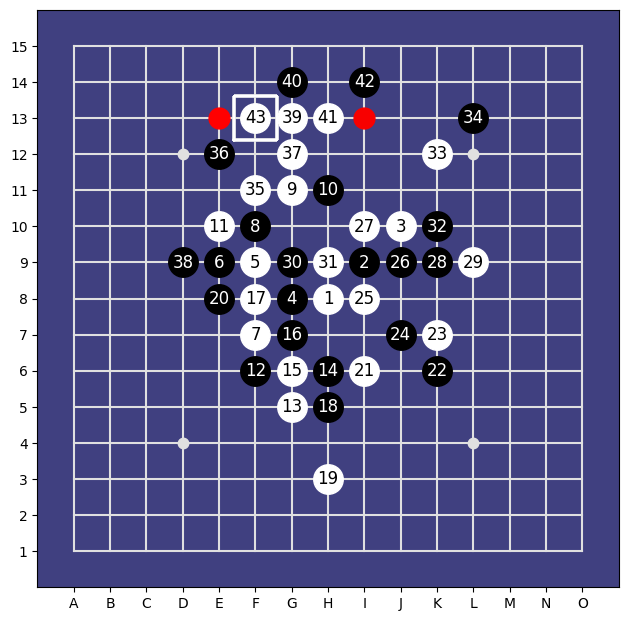

In [8]:
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.utils import analyse_board
moves = [stone.i for stone in arena.board.stones]
heuristics = HeuristicPolicy(BOARD_SIZE, cut_off=0.1)
analyse_board(BOARD_SIZE, moves, heuristics, disp_width=7.5)

/home/wgiersche/.local/share/virtualenvs/DeepGomoku-yQC4gx5q/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


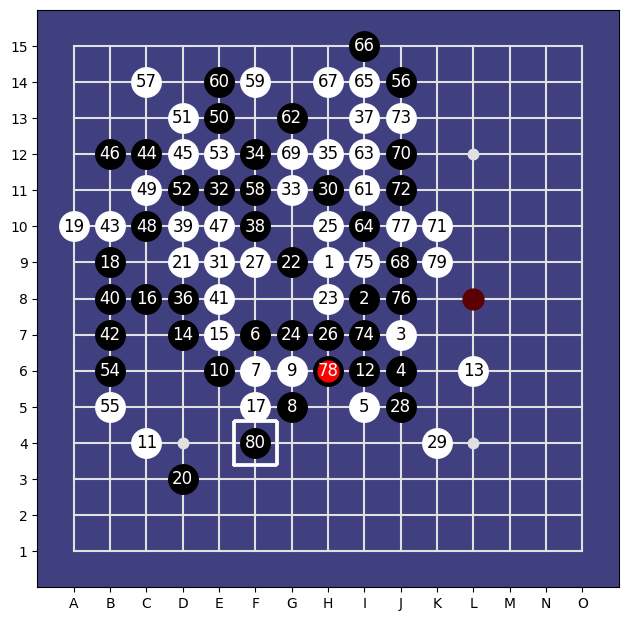

In [9]:
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.utils import analyse_board
moves = arena.games[0]
heuristics = HeuristicPolicy(BOARD_SIZE, cut_off=0.1)
analyse_board(BOARD_SIZE, moves, heuristics, disp_width=7.5)

In [10]:
arena.max_moves

40